Epoch 1/5
1719/1719 [==============================] - 6s 3ms/step - loss: 1.5445 - accuracy: 0.4249 - val_loss: 1.2172 - val_accuracy: 0.5666
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0690 - accuracy: 0.6419 - val_loss: 0.8822 - val_accuracy: 0.6838
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7898 - accuracy: 0.7246 - val_loss: 0.6784 - val_accuracy: 0.7636
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7764 - val_loss: 0.5795 - val_accuracy: 0.8076
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5614 - accuracy: 0.8072 - val_loss: 0.5299 - val_accuracy: 0.8234
Highest accuracy so far: 0.807200014591217
Parameters: Number of Hidden Layers: 2,number of neurons: 10,learning rate: 0.01

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8010 - accuracy: 0.7059 - val_loss: 0.5635 - val_accuracy: 0.8062
Epoch 2/5
1719/17

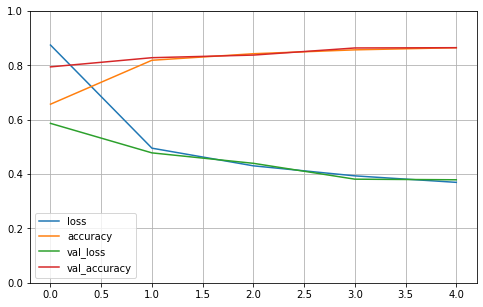

In [7]:
#-------------------------------------------------------------------------
# AUTHOR: Ritika
# FILENAME: DeepLearning
# SPECIFICATION: Classify fashion items
# FOR: CS 5990- Assignment #4
# TIME SPENT: 35 minutes
#-----------------------------------------------------------*/

#IMPORTANT NOTE: YOU CAN USE ANY PYTHON LIBRARY TO COMPLETE YOUR CODE.

#importing the libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def build_model(n_hidden, n_neurons_hidden, n_neurons_output, learning_rate):

    #-->add your Pyhton code here

    #Creating the Neural Network using the Sequential API
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))                                #input layer

    #iterate over the number of hidden layers to create the hidden layers:
    for hidden_layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons_hidden, activation="relu"))                   #hidden layer with ReLU activation function

    #output layer
    model.add(keras.layers.Dense(n_neurons_output, activation="softmax"))                #output layer with one neural for each class and the softmax activation function since the classes are exclusive

    #defining the learning rate
    opt = keras.optimizers.SGD(learning_rate)

    #Compiling the Model specifying the loss function and the optimizer to use.
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model


#To install Tensor Flow on your terminal
#python -m pip install --upgrade tensorflow

#Using Keras to Load the Dataset. Every image is represented as a 28×28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from
#0 to 255) rather than floats (from 0.0 to 255.0).
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

#creating a validation set and scaling the features
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#For Fashion MNIST, we need the list of class names to know what we are dealing with. For instance, class_names[y_train[0]] = 'Coat'
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#Iterate here over number of hidden layers, number of neurons in each hidden layer and the learning rate.
#-->add your Pyhton code here

n_hidden = [2, 5, 10]
n_neurons = [10, 50, 100]
l_rate = [0.01, 0.05, 0.1]

for h in n_hidden:                          #looking or the best parameters w.r.t the number of hidden layers
    for n in n_neurons:                     #looking or the best parameters w.r.t the number of neurons
        for l in l_rate:                    #looking or the best parameters w.r.t the learning rate

            #build the model for each combination by calling the function:
            model = build_model(h,n,10,l)

            #To train the model
            history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))  #epochs = number times that the learning algorithm will work through the entire training dataset.

            #Calculate the accuracy of this neural network and store its value if it is the highest so far. To make a prediction, do:
            class_predicted = np.argmax(model.predict(X_test), axis=-1)
            #-->add your Pyhton code here
            highestAccuracy = history.history['accuracy'][-1]
            print("Highest accuracy so far: " + str(highestAccuracy))
            print("Parameters: " + "Number of Hidden Layers: " + str(h) + ",number of neurons: " + str(n) + ",learning rate: " + str(l))
            print()

#After generating all neural networks, print the summary of the best model found
#The model’s summary() method displays all the model’s layers, including each layer’s name (which is automatically generated unless you set it when creating the layer), its
#output shape (None means the batch size can be anything), and its number of parameters. Note that Dense layers often have a lot of parameters. This gives the model quite a lot of
#flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

print(model.summary())
img_file = './model_arch.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

#plotting the learning curves of the best model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()



